In [1]:
from module import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(context='paper', palette='deep')
sns.set_style('ticks')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 2492 non-null   object
 1   Year                                    2492 non-null   int64 
 2   Number of reported cases of cholera     2470 non-null   object
 3   Number of reported deaths from cholera  2375 non-null   object
 4   Cholera case fatality rate              2365 non-null   object
 5   WHO Region                              2492 non-null   object
dtypes: int64(1), object(5)
memory usage: 116.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 2492 non-

## Exploratory data analysis - Africa

#### 1. Sum of cases, deaths, and fatality rate of cholera in countries from the African continent

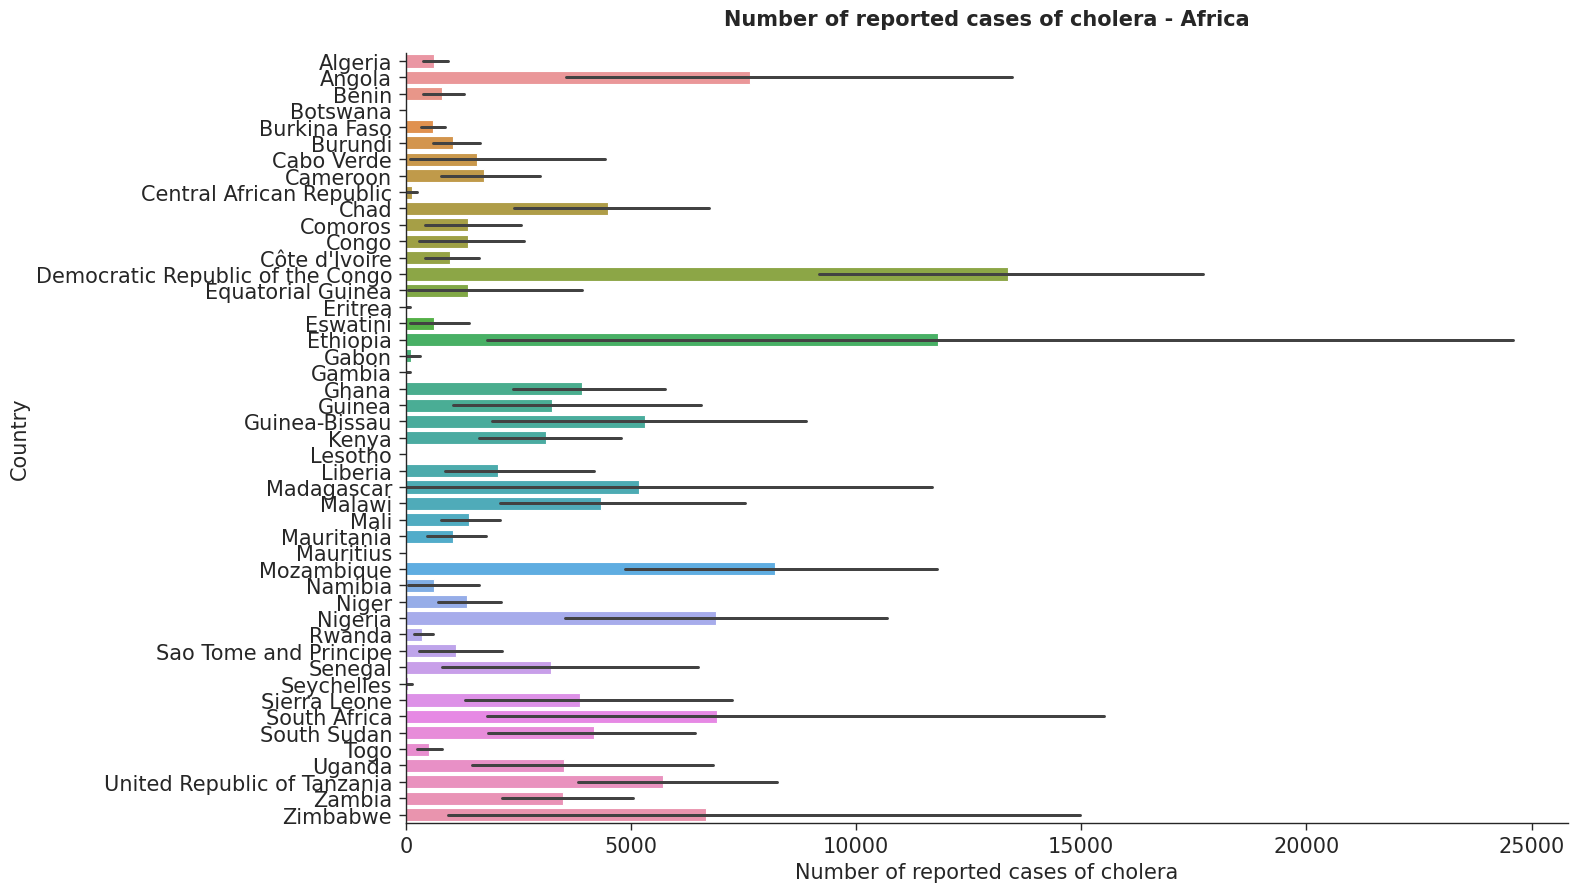

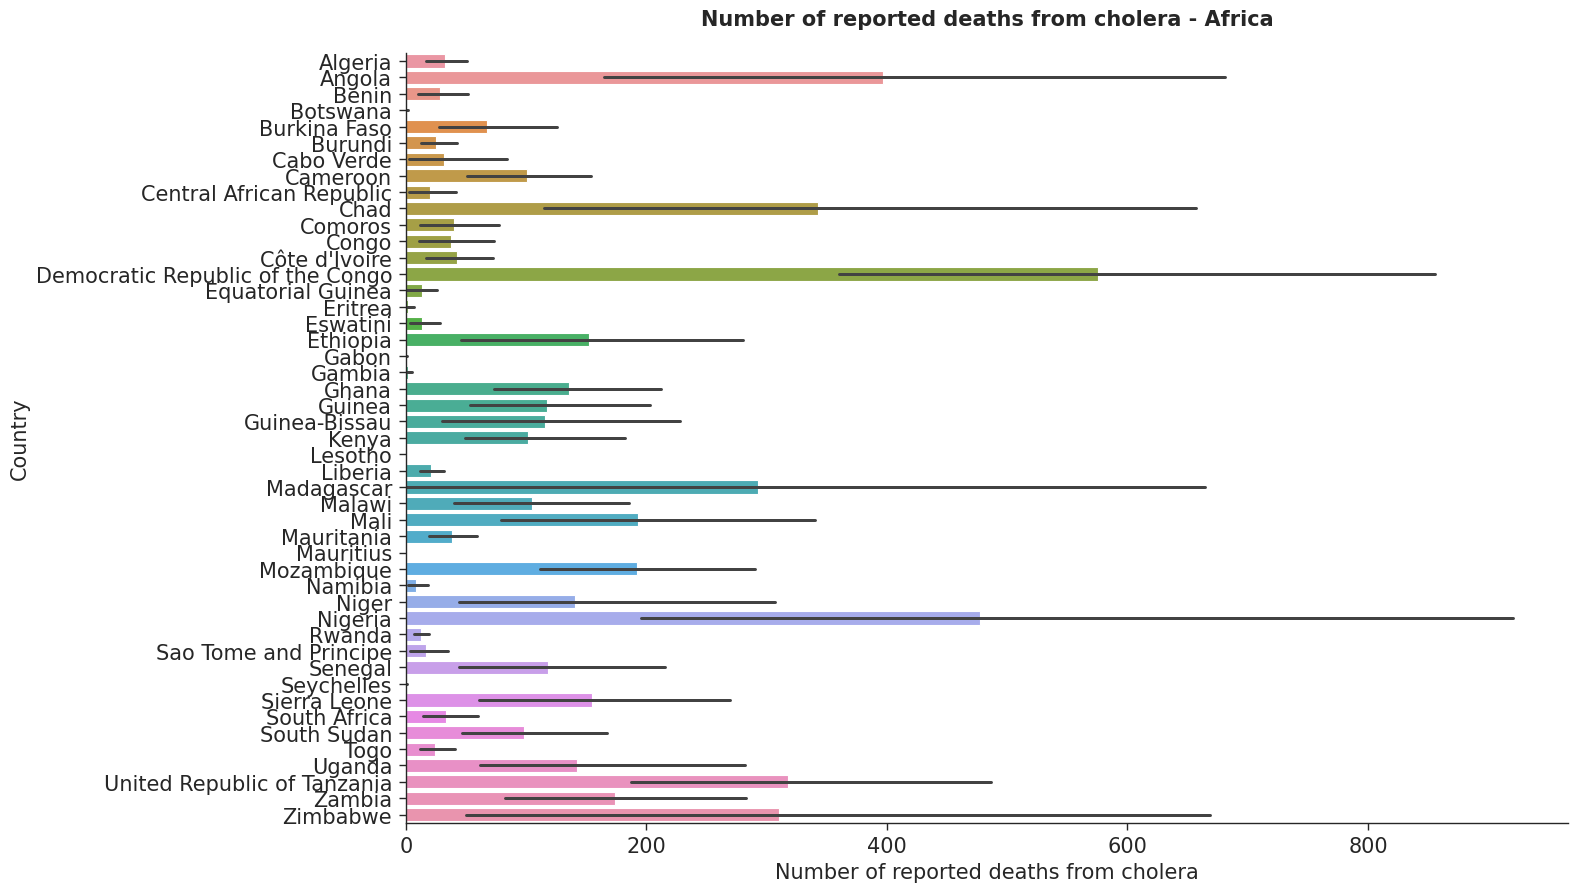

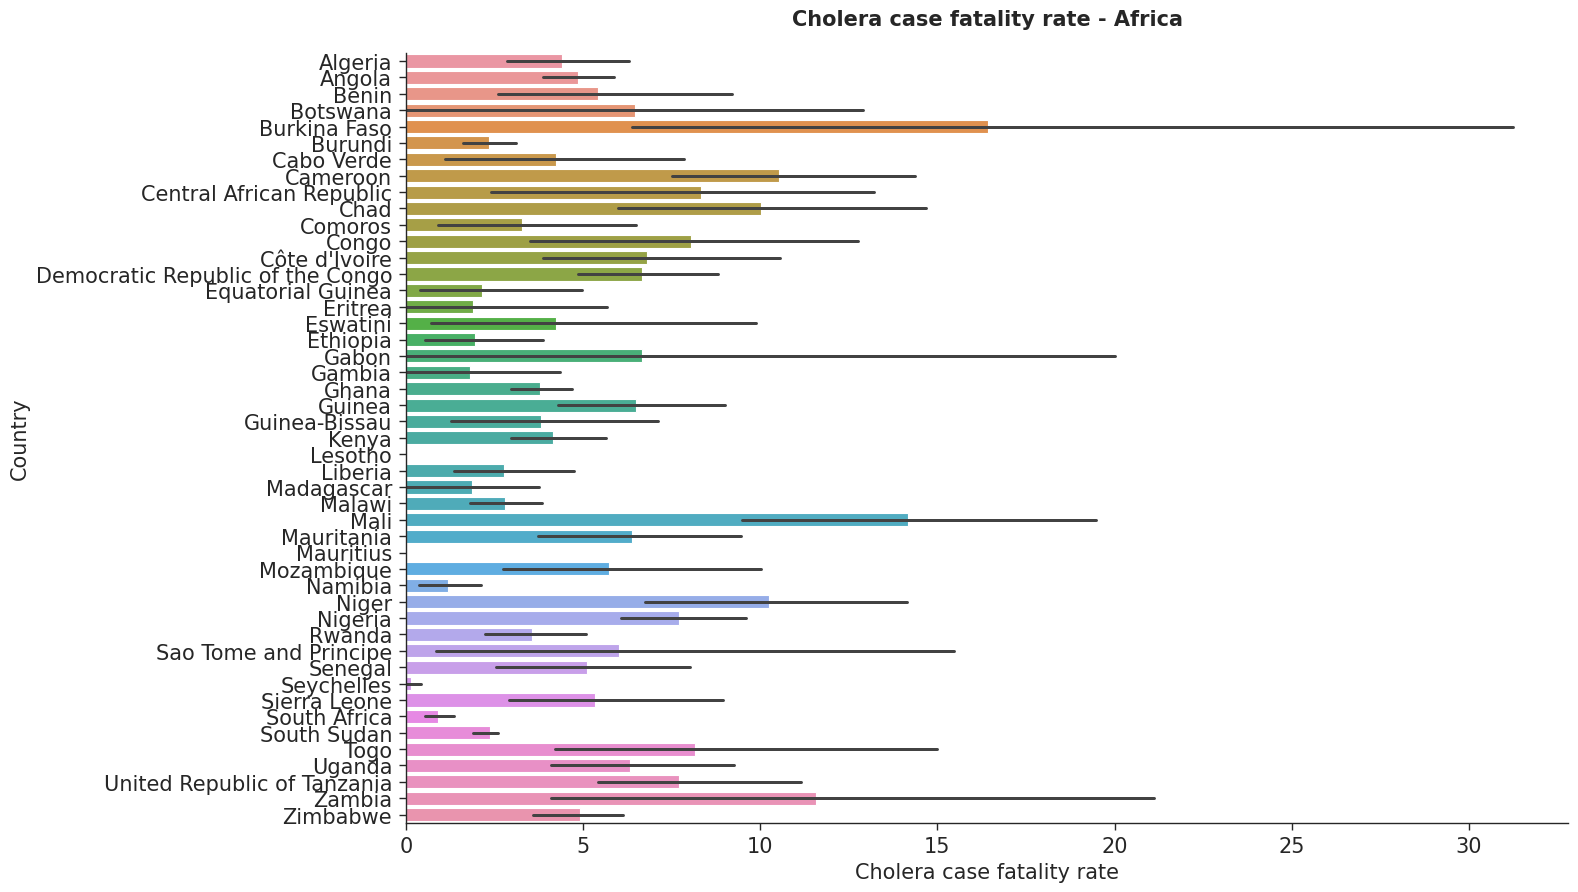

In [2]:
data_africa = data.loc[data['WHO Region']=='Africa']

for c in data_africa.select_dtypes(include=np.number):
  if c == 'Year':
    continue
  else:    
    fig = plt.figure(figsize=(15,10))

    barplot = sns.barplot(
            data=data_africa,
            x=c,
            y='Country',
            dodge=False
        )
    
    barplot.tick_params(
            labelsize=15, 
            pad=5)
    
    sns.despine()

    plt.title(
            f'{c} - Africa',
            fontsize=15,
            fontweight='bold',
            pad = 20)

    plt.ylabel(
            'Country',
            fontsize=15
        )

    plt.xlabel(
            c,
            fontsize=15
        )

    plt.show()
    print('\n')

#### 2. Distribution of cases, deaths, and fatality rate over the years

In [3]:
for i in data_africa.select_dtypes(include=np.number):
    
    if i != 'Year':
        fig = px.scatter(
            data_frame = data_africa,
            x='Year',
            y=i,
            color='Country',
            width=800,
            title=i
        )

        fig.show()

#### 2. Number of cases and deaths per country per year

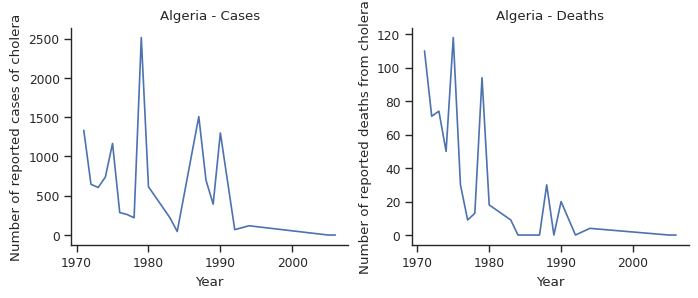

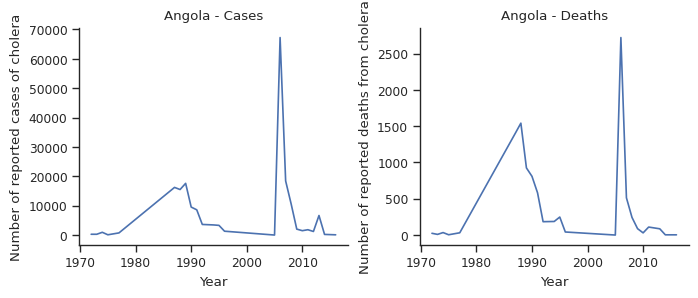

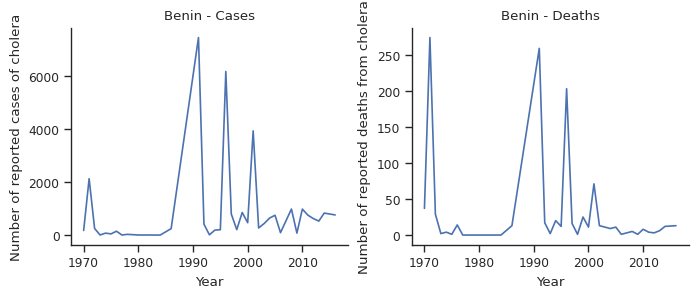

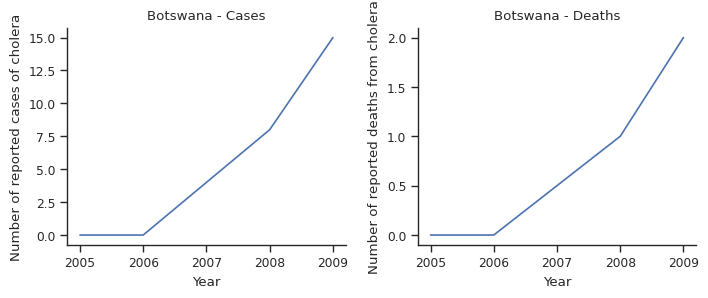

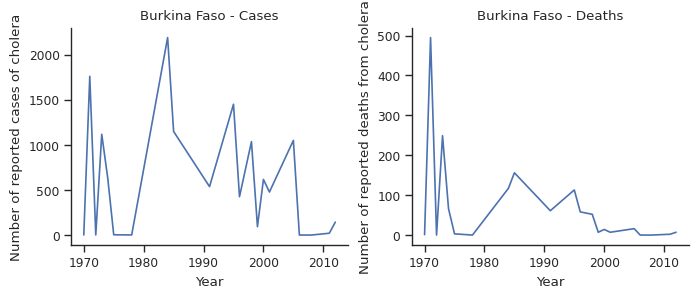

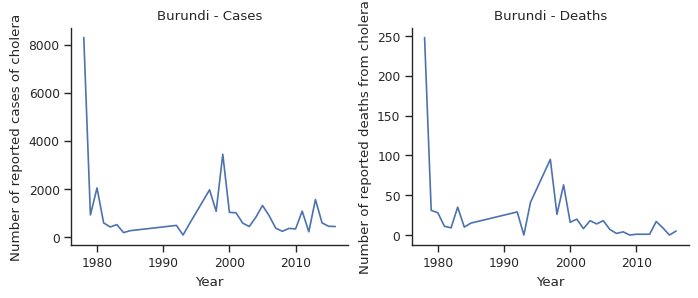

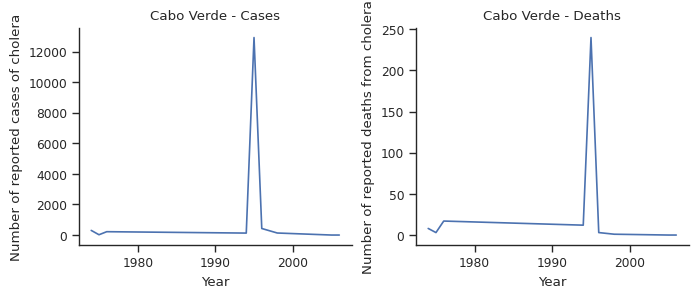

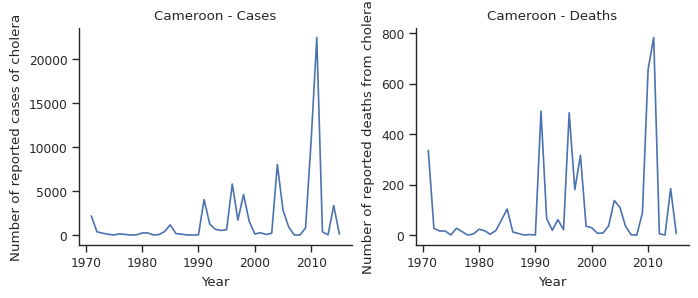

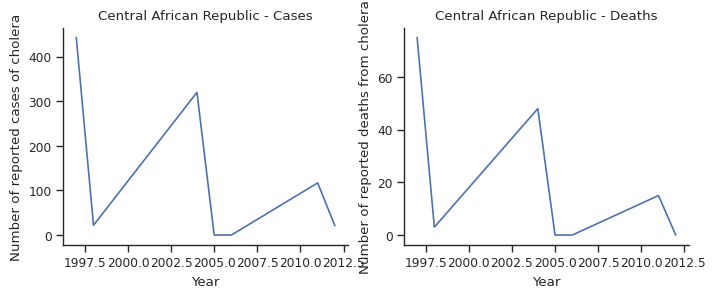

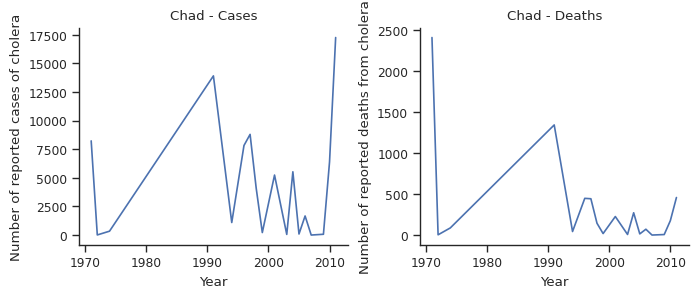

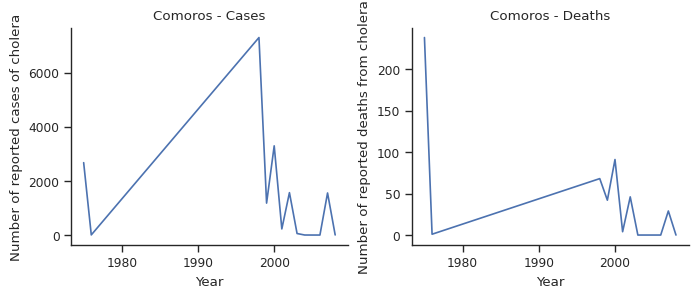

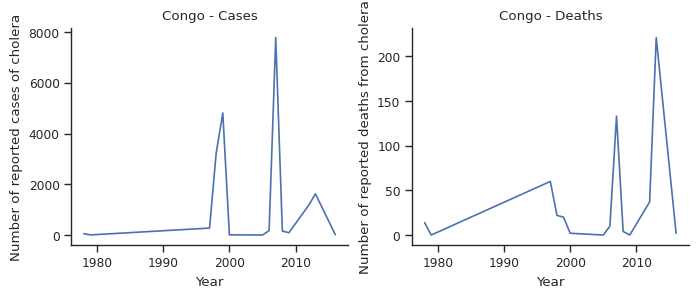

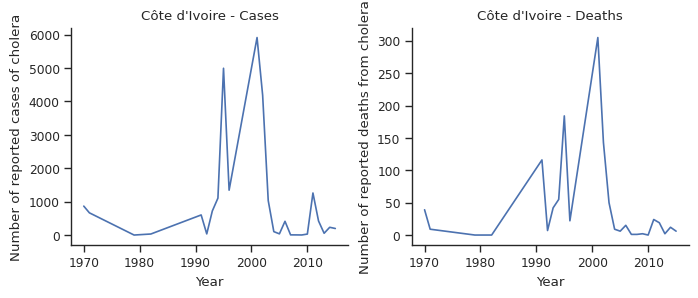

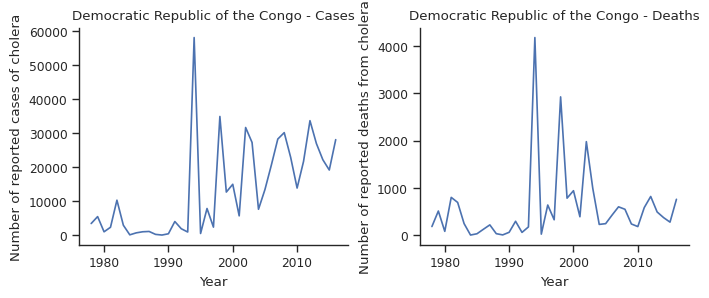

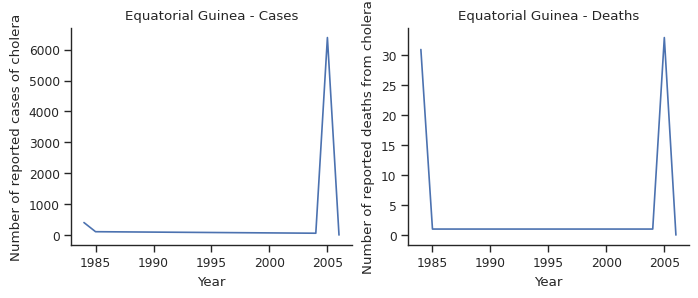

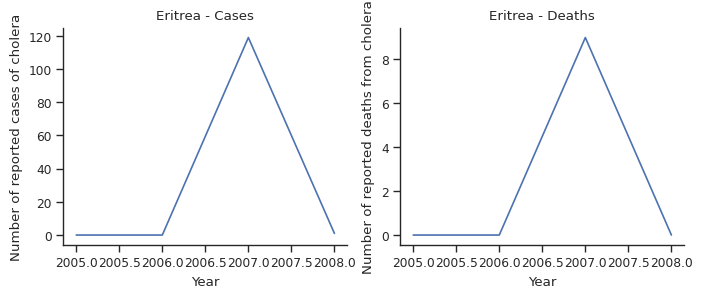

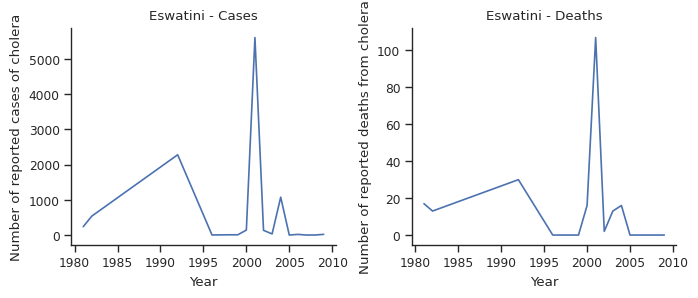

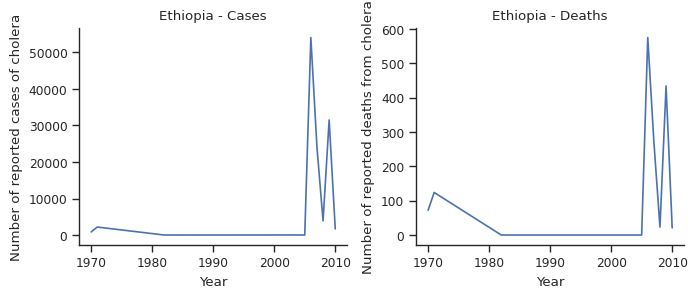

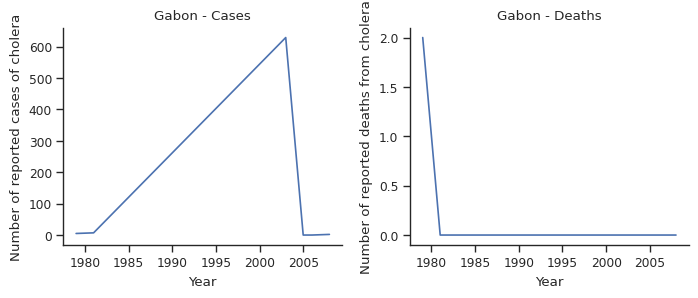

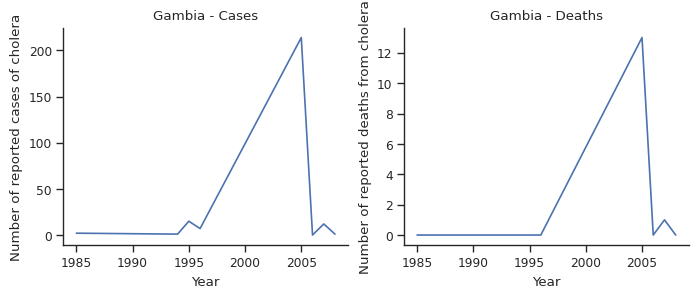

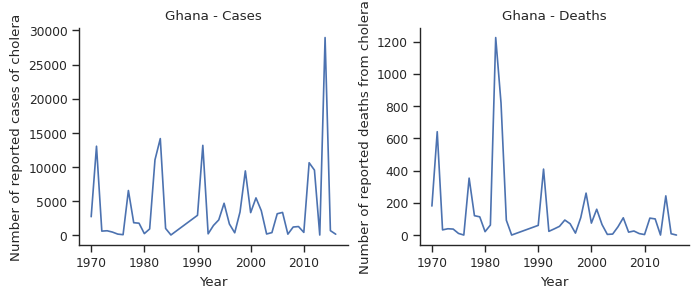

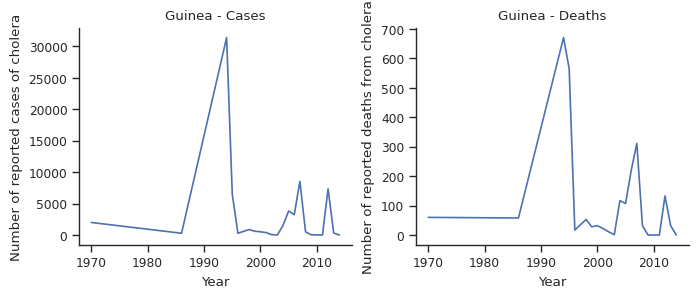

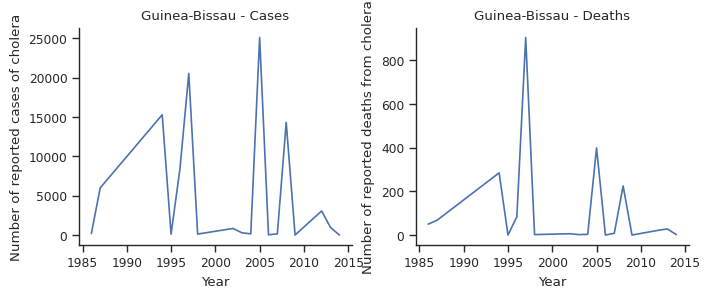

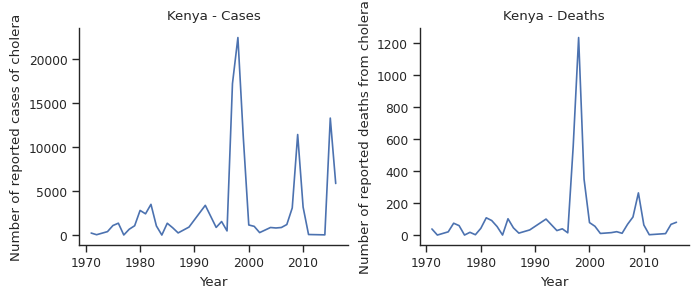

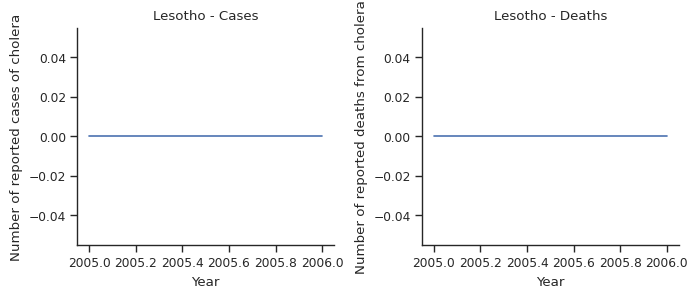

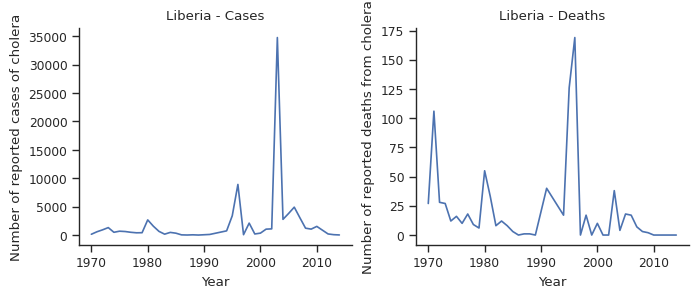

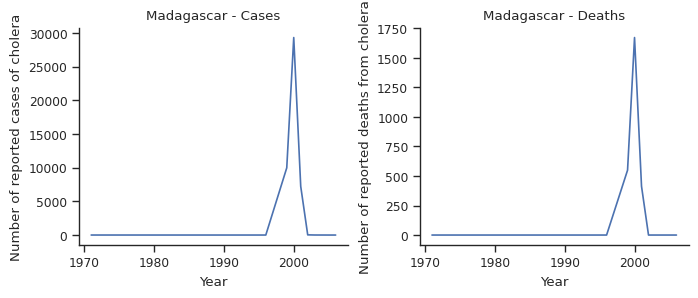

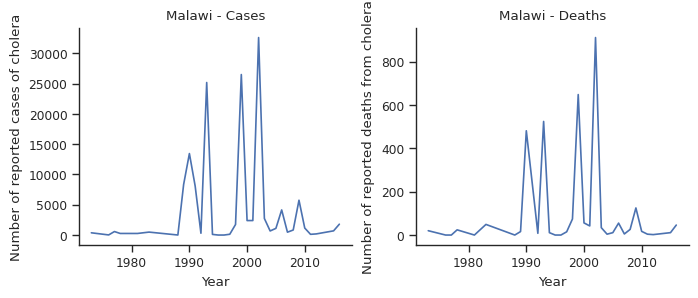

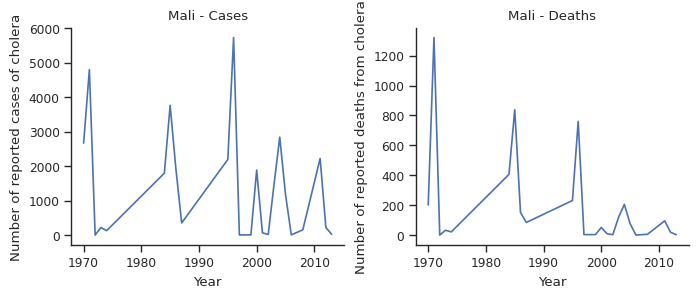

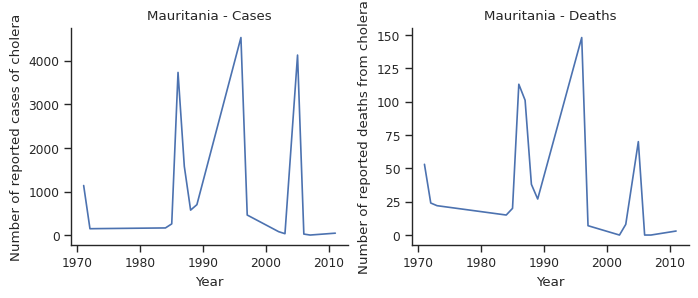

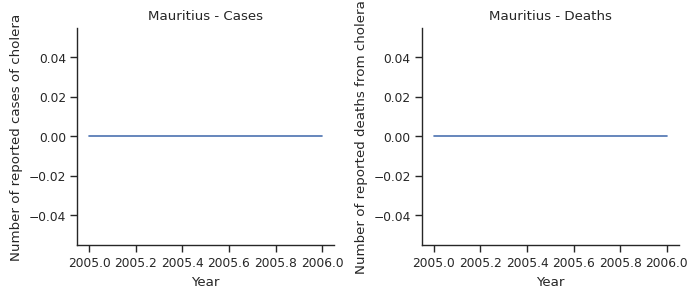

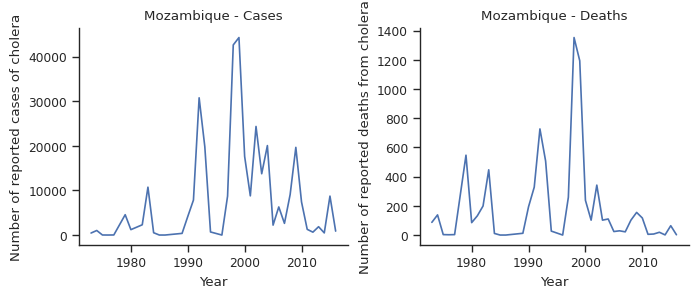

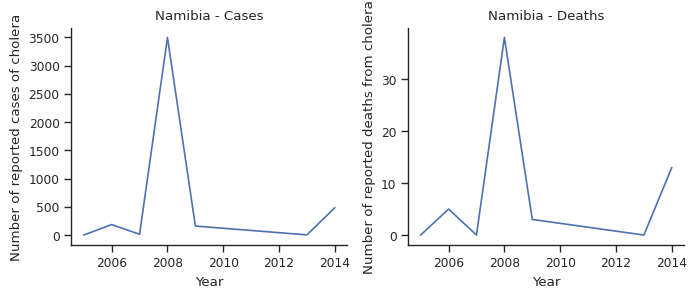

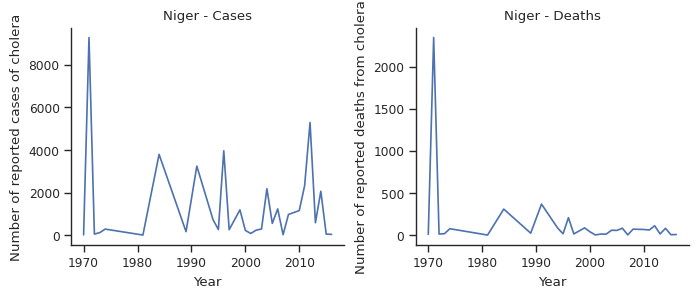

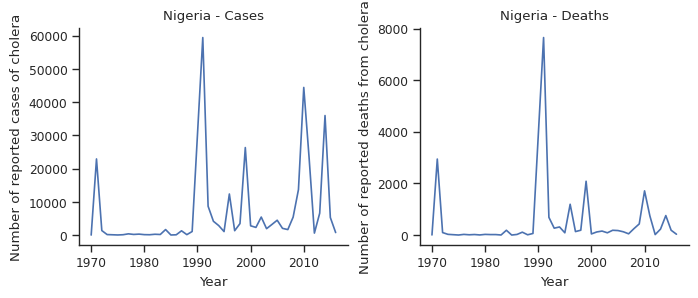

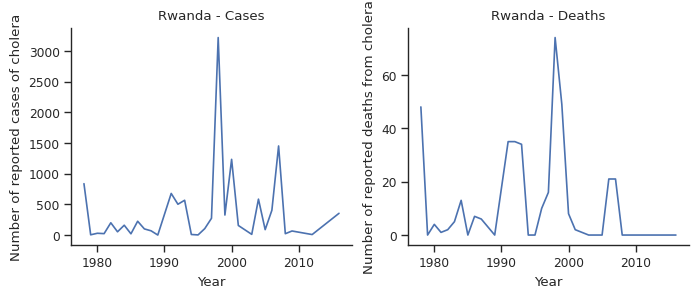

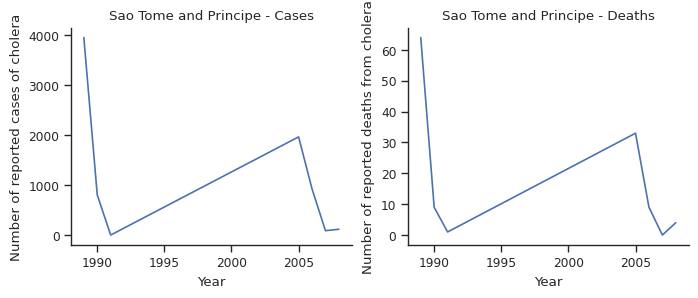

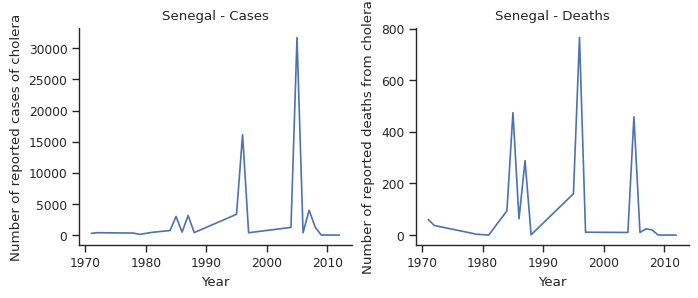

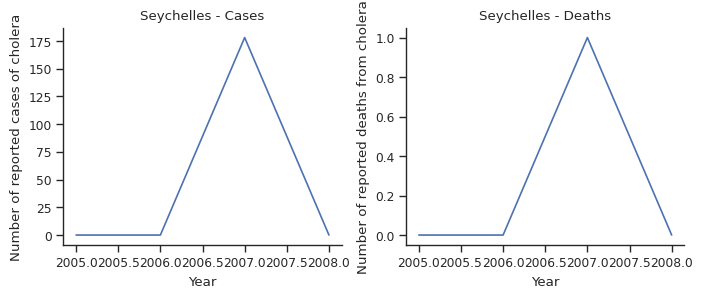

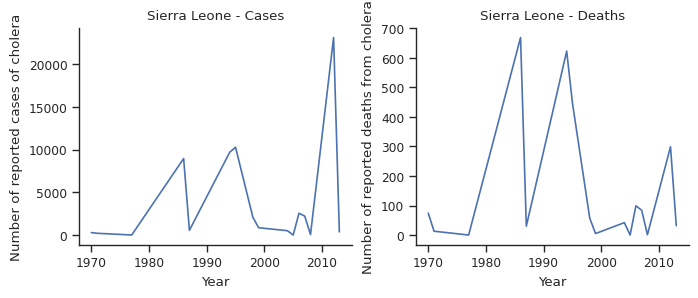

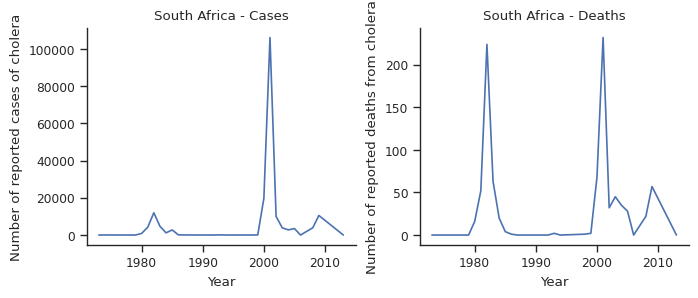

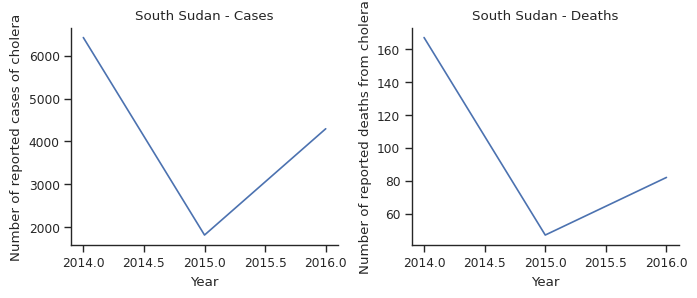

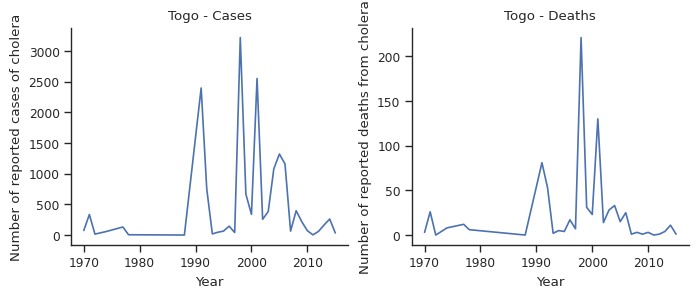

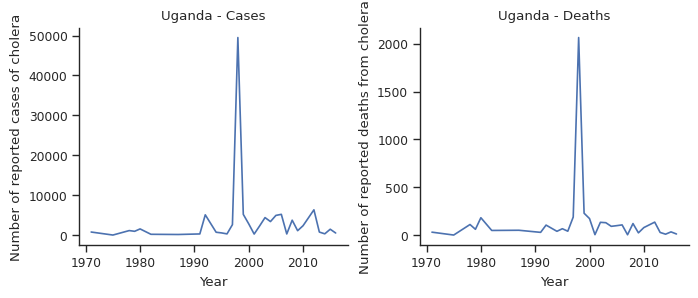

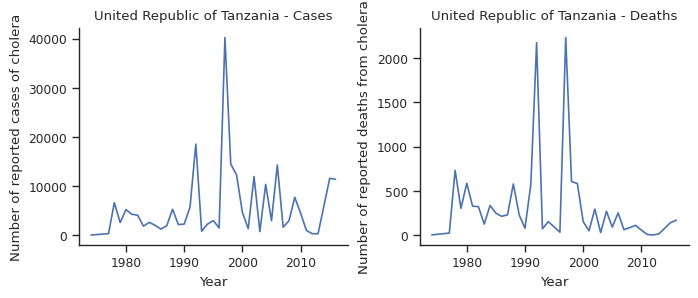

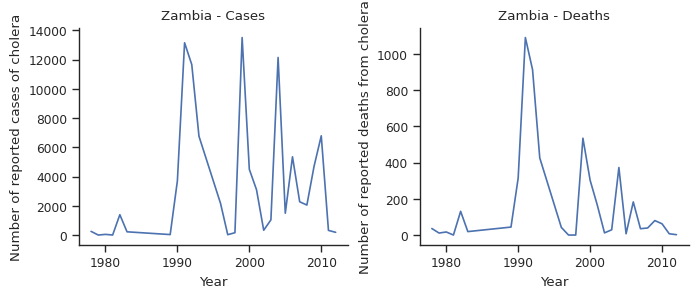

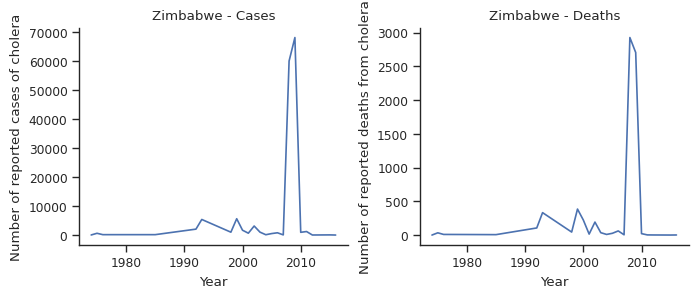

In [4]:
for i in data_africa['Country'].unique():

    fig, axes = plt.subplots(1, 2, figsize=(7,3))

    sns.lineplot(
        data=data_africa.loc[data['Country']==i],
        x='Year',
        y='Number of reported cases of cholera',
        ax=axes[0])

    axes[0].set(
        title=f'{i} - Cases'
    )

    sns.lineplot(
        data=data_africa.loc[data['Country']==i],
        x='Year',
        y='Number of reported deaths from cholera',
        ax=axes[1])
    
    axes[1].set(
        title=f'{i} - Deaths'
    )
    fig.tight_layout(pad=0.8)
    sns.despine()
    plt.show()

#### 3. Cases vs Deaths per country

In [5]:
for i in data_africa['Country'].unique():

    fig = px.bar(
    data_frame = data_africa.loc[data['Country']==i], 
    x='Year', 
    y='Number of reported cases of cholera', 
    width=1000, 
    color='Number of reported deaths from cholera',
    color_discrete_sequence ='viridis',
    title=f'{i} - Cases vs Deaths')

    fig.show()

#### 3. Correlation heatmap

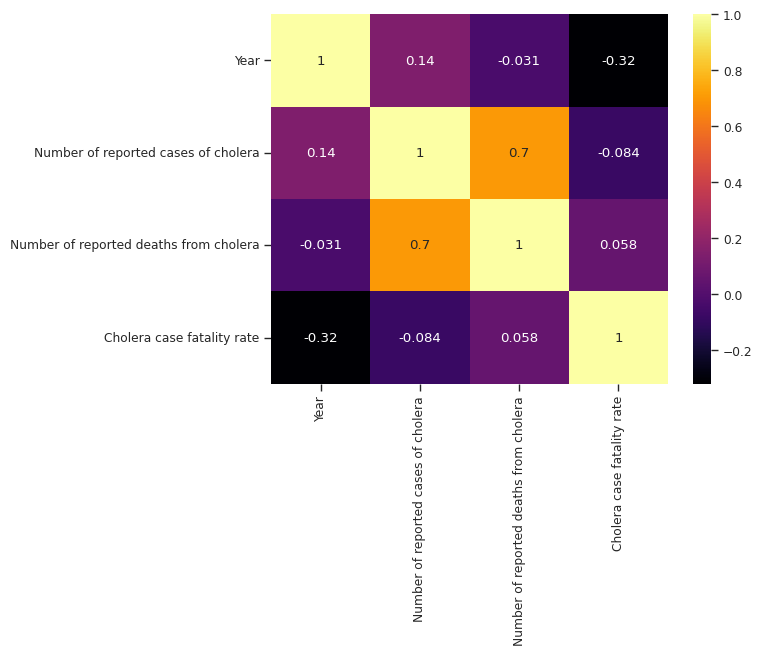

In [6]:
sns.heatmap(
    data=data_africa.corr(numeric_only=True),
    cmap='inferno',
    annot=True)

plt.show()

## Conclusions:

- Oral vaccines for cholera were introduced in the 90's. Even though, cholera appears to have remained epidemic in Africa. However, the overall fatality rate decreased.
- However, the lack of information for some countries (such as Botswana, Cabo Verde, Mauritius, Erithrea) are prejudicial and prevents any further conclusions
- As expected, the number of cholera cases and the number of deaths are correlated. The most death reports occur in years with more cases, as shown by line and barplots
